In [19]:
from keras.models import load_model

model = load_model('models/binary.h5')

In [20]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_69 (Conv2D)          (None, 252, 252, 16)      1216      
                                                                 
 max_pooling2d_69 (MaxPooli  (None, 126, 126, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_70 (Conv2D)          (None, 124, 124, 16)      2320      
                                                                 
 max_pooling2d_70 (MaxPooli  (None, 62, 62, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_42 (Dropout)        (None, 62, 62, 16)        0         
                                                                 
 conv2d_71 (Conv2D)          (None, 60, 60, 32)      

In [21]:
import cv2
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np

In [28]:
import os
if '.DS_Store' in os.listdir(data_dir):
    path = os.path.join(data_dir, '.DS_Store')
    os.remove(path)
data_dir = 'bobatest'
preds = []
imgs = []
for image in os.listdir(data_dir):
    image_path = os.path.join(data_dir,image)
    try: 
        img = cv2.imread(image_path)
        imgs.append(img)
        resize = tf.image.resize(img, (256,256))
        yhat = model.predict(np.expand_dims(resize/255, 0))
        if yhat < 0.5: 
            preds.append(["Not Guilty",float(yhat)])
        else:
            preds.append(["Guilty",float(yhat)])
    except:
        print("error with", image)

1/1 [==============================] - 0s 15ms/step


In [29]:
len(imgs)

6

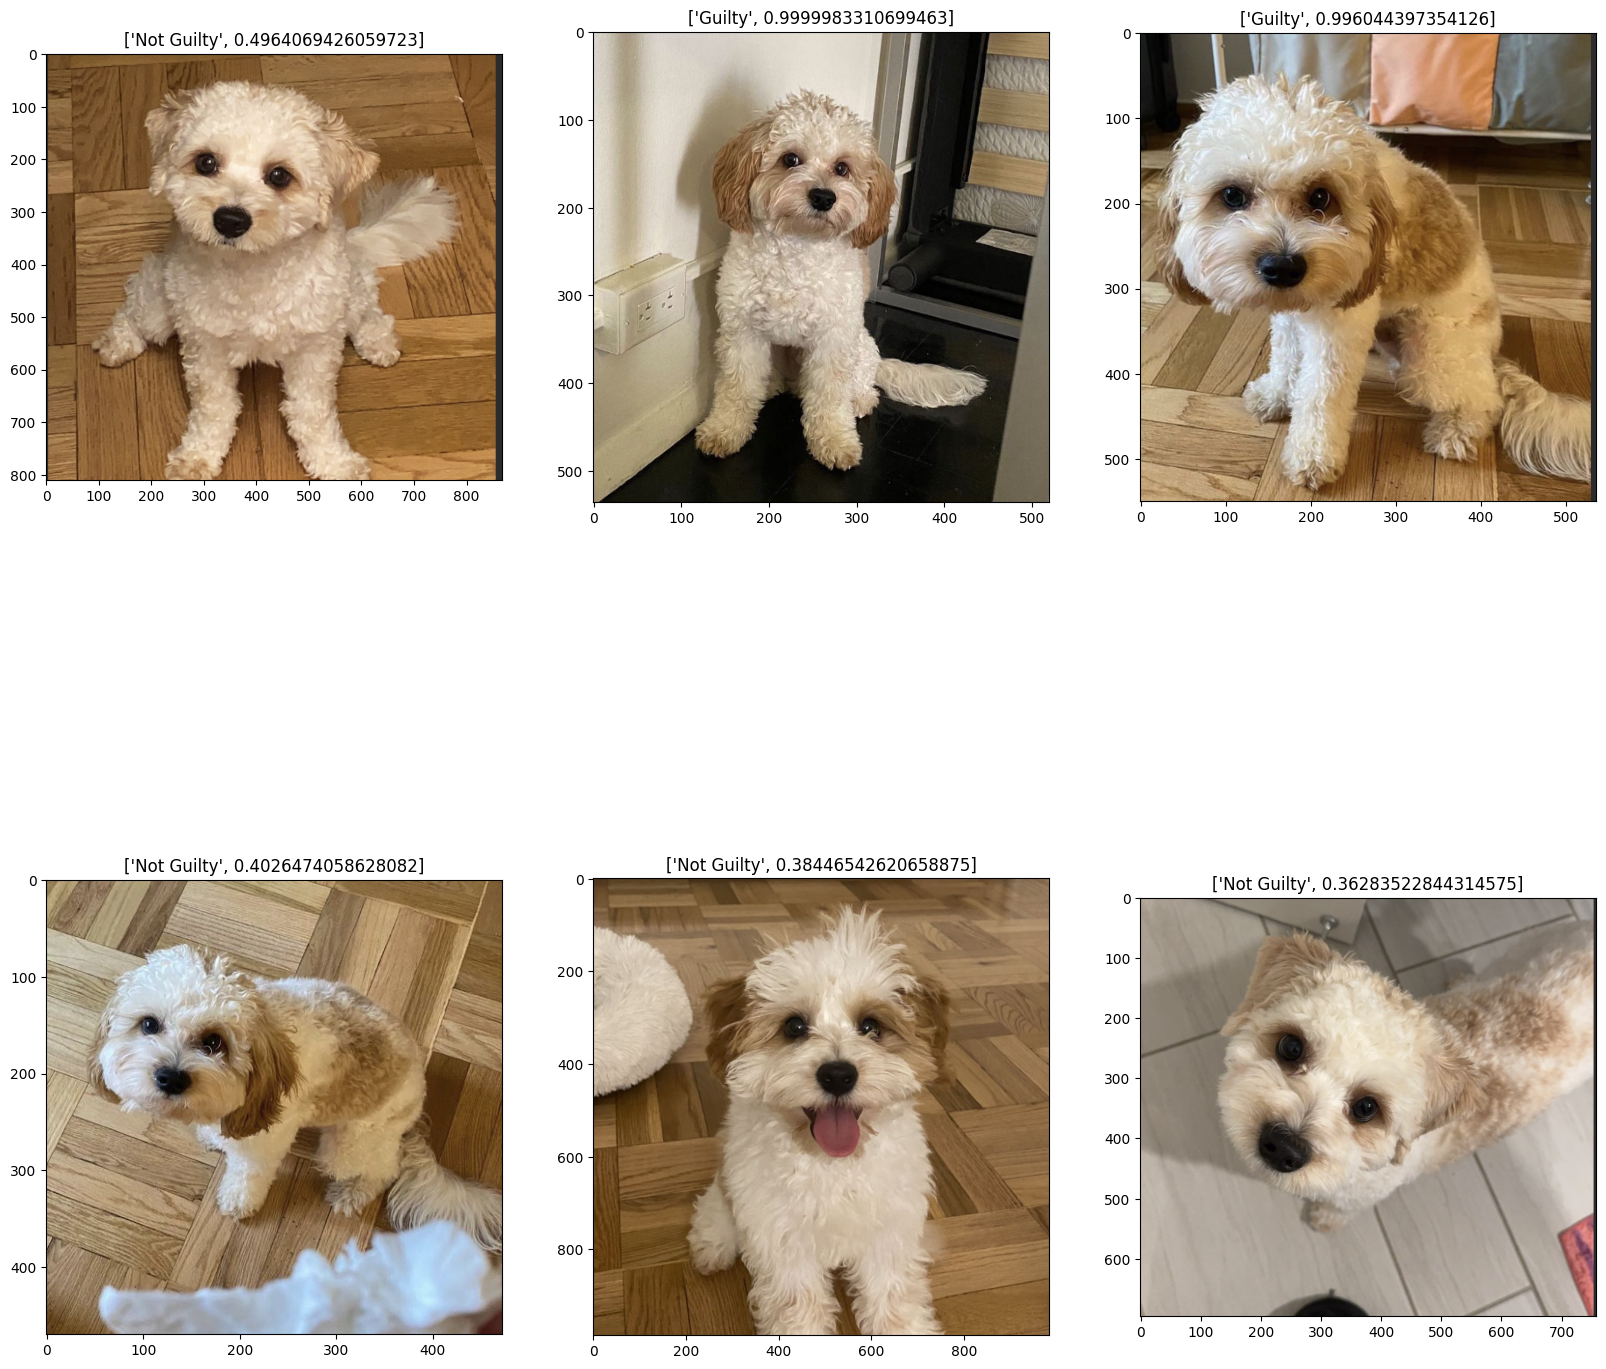

In [30]:
fig, axs = plt.subplots(nrows= 2,ncols=3, figsize=(20,20))
counter = 0
for i in axs:
    for ax in i:
        ax.imshow(imgs[counter][:,:,::-1])
        ax.title.set_text(preds[counter])
        counter+=1